# 디지털신호처리 (DSP) HW09
#### 이름 : 이연우
#### 학번 : 201810793
#### 학과 : 휴먼지능정보공학과

### - 문제
a) convolve 함수를 cropping 방법을 이용하여 output image의 intensity를 image 표현값 안으로 유지할 수 있도록 convolve 함수를 재작성 하세요.

b) 3x3 Gaussian filter 와 7x7 Gaussian filter를 사용하여 cat 이미지를 smoothing 하여 그림을 출력하고, 그 차이점을 설명하세요.

c) 3x3 Laplacian filter를 사용하여 cat 이미지의 윤곽선을 추출하고 그림을 출력하세요. 또한, b)에서 smoothing 된 이미지를 이용하여 윤곽선을 추출하고 그림을 출력하세요. 두 가지 경우의 차이점을 설명하세요.

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import data

### 0) Cat 원본 이미지 출력

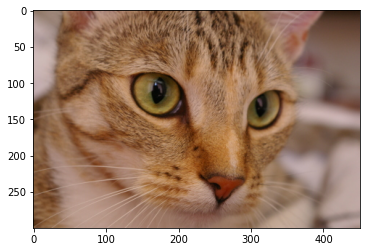

In [50]:
cat = data.chelsea()
plt.imshow(cat)

### a) convolve 함수를 cropping 방법을 이용하여 output image의 intensity를 image 표현값 안으로 유지할 수 있도록 convolve 함수를 재작성 하세요.
#### Clip values 사용

In [51]:
def convolve(image, kernel, scale=1):
    (iH, iW) = image.shape[:2]
    (kH, kW) = kernel.shape[:2]

    pad = (kW - 1)//2 # 패딩으로 원래이미지보다 크게 만들어줌
    output = np.zeros((iH-2*pad, iW-2*pad), dtype="float32") # 패딩을 안함 

    # loop over the input image, "sliding" the kernel across each (x, y)-coordinate from left-to-right and top to bottom
    for y in np.arange(pad, iH - pad):
        for x in np.arange(pad, iW - pad):
            roi = image[y-pad:y+pad+1, x-pad:x+pad+1] # 관심있는 영역, 필터링할 영역
            output[y-pad, x-pad] = (roi * kernel).sum()*scale

    for y in np.arange(pad, iH - pad):
        for x in np.arange(pad, iW - pad):
            if output[y-pad, x-pad] > 255 :
                output[y-pad, x-pad] = 255
            elif output[y-pad, x-pad] < 0 :
                output[y-pad, x-pad] = 0
            else :
                output[y-pad, x-pad] = output[y-pad, x-pad]
 
    # return the output image
    return output

### b) 3x3 Gaussian filter 와 7x7 Gaussian filter를 사용하여 cat 이미지를 smoothing 하여 그림을 출력하고, 그 차이점을 설명하세요.

#### - 3x3 Gaussian filter

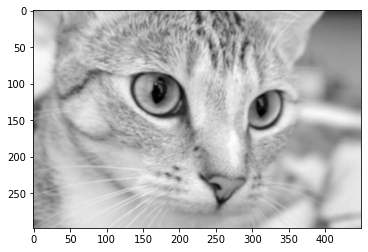

In [53]:
Gaussian3x3 = np.array((
    [1,2,1],
    [2,4,2],
    [1,2,1]), dtype = "int")

Gaussian3 = convolve(cat[:,:,0], Gaussian3x3, scale=1/16)
plt.imshow(Gaussian3, cmap=plt.cm.gray)

#### - 7x7 Gaussian filter

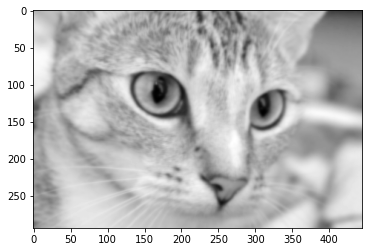

In [54]:
Gaussian7x7 = np.array((
    [1,2,4,8,4,2,1], #22
    [2,4,8,16,8,4,2], #44
    [4,8,16,32,16,8,4], #88
    [8,16,32,64,32,16,8],#192
    [4,8,16,32,16,8,4],
    [2,4,8,16,8,4,2],
    [1,2,4,8,4,2,1],), dtype = "int")

Gaussian7 = convolve(cat[:,:,0], Gaussian7x7, scale=1/500)
plt.imshow(Gaussian7, cmap=plt.cm.gray)

3x3 Gaussian filter 와 7x7 Gaussian filter를 사용했을 때 고양이의 털과 수염 부분을 집중하여 비교하면 7x7 Gaussian filter가 더 블러 처리(smoothing)된 것을 볼 수 있다. kerner의 크기가 커질 수록 사진이 뭉게지는 것을 알 수 있다.

#### c) 3x3 Laplacian filter를 사용하여 cat 이미지의 윤곽선을 추출하고 그림을 출력하세요. 또한, b)에서 smoothing 된 이미지를 이용하여 윤곽선을 추출하고 그림을 출력하세요. 두 가지 경우의 차이점을 설명하세요.

#### - 3x3 Laplacian filter를 사용하여 cat 이미지의 윤곽선을 추출

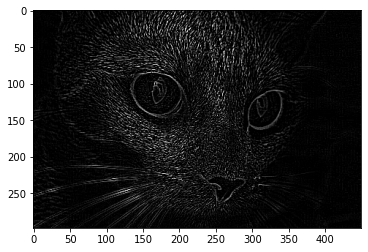

In [56]:
Laplacian3x3 = np.array((
    [1,1,1],
    [1,-8,1],
    [1,1,1]), dtype = "int")

Laplacian3 = convolve(cat[:,:,0], Laplacian3x3)
plt.imshow(Laplacian3, cmap=plt.cm.gray)

#### -  b)에서 smoothing 된 이미지를 이용하여 윤곽선을 추출

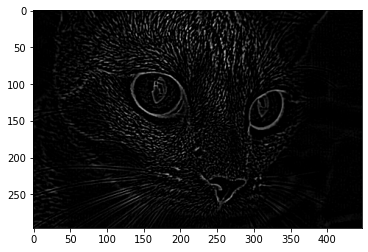

In [65]:
GLaplacian3 = convolve(Gaussian3[:,:], Laplacian3x3)
plt.imshow(GLaplacian3, cmap=plt.cm.gray)

Laplacian은 노이즈에 민감하기 때문에 노이즈도 edge로 판단하여 원본 사진에서 Laplacian을 바로 사용해 윤곽선을 추출한 경우 필요없는 잔선도 함께 추출하여 나온 것을 볼 수 있다. smoothing을 먼저 한 후 윤곽선을 추출한 경우 smoothing이 low-pass처리를 한 후, 노이즈를 줄인 상태에서 Laplacian을 하기 때문에 노이즈 없이 원하는 부분만 윤곽선을 추출해 주는 것을 알 수 있다. 깔끔한 윤곽선을 추출하기 위해서는 smoothing을 먼저 한 후 Laplacian을 하는 것을 권장한다.